# 1. Data Collection and Preprocessing

● Collect a dataset of labeled news articles (sports, politics, technology etc).

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string 
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim.models import Word2Vec
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv('data_news - data_news.csv')

In [5]:
# Check basic info
print("Dataset Info:")
print(df.info())

# Check sample data
print("\nSample Data:")
print(df.head())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class imbalance (positive vs negative)
print("\nClass Distribution:")
print(df['category'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB
None

Sample Data:
   category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/ent


Description Length Statistics:
count    50000.000000
mean        22.981900
std         13.590334
min          1.000000
25%         14.000000
50%         21.000000
75%         29.000000
max        222.000000
Name: description_length, dtype: float64


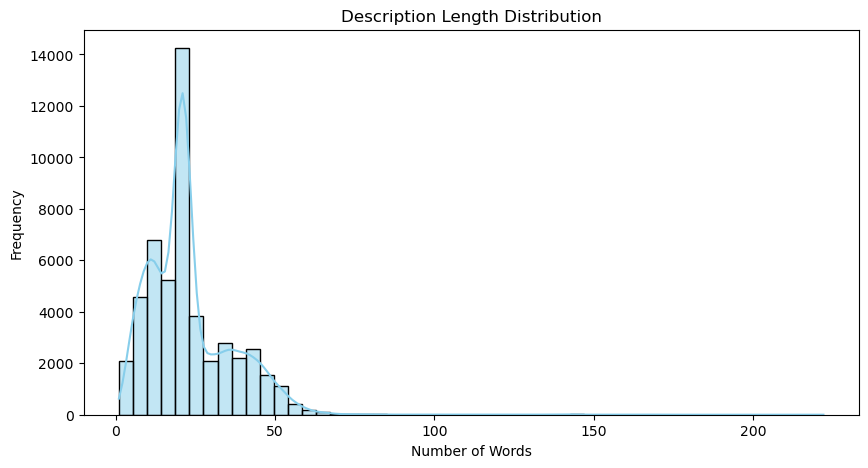

In [6]:
# Analyze description lengths (word count per description)
df['description_length'] = df['short_description'].apply(lambda x: len(x.split()))

# Review length stats
print("\nDescription Length Statistics:")
print(df['description_length'].describe())

# Review length distribution plot
plt.figure(figsize=(10,5))
sns.histplot(df['description_length'], bins=50, kde=True, color='skyblue')
plt.title('Description Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

● Clean and preprocess the text data.

In [8]:
# Initialize tools for preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    # remove special characters, numbers, and puctuaions in the text
    text = re.sub(r'[^a-z\s]', '', text)

    #convert text to lowercase
    text = text.lower()
    
    # tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin words into cleaned text
    return ' '.join(tokens)

# Apply preprocessing to all reviews
df['cleaned_description'] = df['short_description'].apply(preprocess_text)
df['cleaned_headline'] = df['headline'].apply(preprocess_text)

In [9]:
# Sample before and after cleaning
print("\nSample Description Before Cleaning:")
print(df['short_description'].iloc[1])
print("\nSample Descrption After Cleaning:")
print(df['cleaned_description'].iloc[1])

print("\nSample Headline Before Cleaning:")
print(df['headline'].iloc[1])
print("\nSample Review After Cleaning:")
print(df['cleaned_headline'].iloc[1])


Sample Description Before Cleaning:
Think of talking to yourself as a tool to coach yourself through a challenge, or to narrate your own experiences to yourself. In any case, treat yourself with respect and you just may find you enjoy your own company.

Sample Descrption After Cleaning:
hink talking tool coach challenge narrate experience n case treat respect may find enjoy company

Sample Headline Before Cleaning:
Talking to Yourself: Crazy or Crazy Helpful?

Sample Review After Cleaning:
alking ourself razy razy elpful


● Handle missing data, if any, and ensure the text is ready for feature extraction.

In [11]:
# Rplacing Blank values with NA (specifically in keywords column)
df = df.fillna('NA')

#checking the null entries again
df.isnull().sum()

category               0
headline               0
links                  0
short_description      0
keywords               0
description_length     0
cleaned_description    0
cleaned_headline       0
dtype: int64

In [12]:
def preprocess_keywords(text):

    # remove special characters, numbers, and puctuaions in the text
    text = re.sub(r'[^a-z\s-]', '', text)
    text = text.replace('-', ' ')

    #convert text to lowercase
    text = text.lower()
    
    # tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin words into cleaned text
    return ' '.join(tokens)
df['cleaned_keywords'] = df['keywords'].apply(preprocess_keywords)

print("\nSample Keywords Before Cleaning:")
print(df['keywords'].iloc[1])
print("\nSample Review After Cleaning:")
print(df['cleaned_keywords'].iloc[1])


Sample Keywords Before Cleaning:
talking-to-yourself-crazy

Sample Review After Cleaning:
talking crazy


# 2. Feature Extraction

● Use methods like TF-IDF, word embeddings (e.g., Word2Vec, GloVe), or
bag-of-words to convert text data into numerical features.

In [14]:
# Vectorization
# Bag of Words (BoW)
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['cleaned_description'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_description'])

print("\nBoW Matrix Shape:", X_bow.shape)
print("\nTF-IDF Matrix Shape:", X_tfidf.shape)

# Preview sample BoW features
print("\nSample BoW Features:")
print(bow_vectorizer.get_feature_names_out()[:50])

# Preview sample TF-IDF features
print("\nSample TF-IDF Features:")
print(tfidf_vectorizer.get_feature_names_out()[:50])


BoW Matrix Shape: (50000, 46564)

TF-IDF Matrix Shape: (50000, 46564)

Sample BoW Features:
['aa' 'aaaaaaaaah' 'aaaaaas' 'aaar' 'aab' 'aack' 'aad' 'aada' 'aadi'
 'aafar' 'aak' 'aale' 'aalle' 'aame' 'aan' 'aanapali' 'aanen' 'aanzo'
 'aartent' 'aas' 'aash' 'aastricht' 'aatalii' 'ab' 'aba' 'abaa' 'aback'
 'abah' 'abak' 'abal' 'aban' 'abana' 'abandon' 'abandoned' 'abandoning'
 'abandonment' 'abanga' 'abari' 'abarrus' 'abasco' 'abat' 'abata' 'abate'
 'abaya' 'abba' 'abbage' 'abbana' 'abbanas' 'abbath' 'abbi']

Sample TF-IDF Features:
['aa' 'aaaaaaaaah' 'aaaaaas' 'aaar' 'aab' 'aack' 'aad' 'aada' 'aadi'
 'aafar' 'aak' 'aale' 'aalle' 'aame' 'aan' 'aanapali' 'aanen' 'aanzo'
 'aartent' 'aas' 'aash' 'aastricht' 'aatalii' 'ab' 'aba' 'abaa' 'aback'
 'abah' 'abak' 'abal' 'aban' 'abana' 'abandon' 'abandoned' 'abandoning'
 'abandonment' 'abanga' 'abari' 'abarrus' 'abasco' 'abat' 'abata' 'abate'
 'abaya' 'abba' 'abbage' 'abbana' 'abbanas' 'abbath' 'abbi']


In [15]:
# Tokenize reviews for Word2Vec
df['tokenized_description'] = df['cleaned_description'].apply(lambda x: word_tokenize(str(x).lower()))

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_description'], vector_size=100, window=5, min_count=2, workers=4)

# Function to get review embeddings by averaging word vectors
def get_word2vec_embedding(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100 # Handling empty tokens

# Apply function to get Word2Vec embeddings
df['word2vec_embedding'] = df['tokenized_description'].apply(lambda x: get_word2vec_embedding(x, word2vec_model))

# Show first few embeddings
df[['word2vec_embedding']].head()

,word2vec_embedding
0,"[-0.04063969, 0.27922925, 0.0032164939, 0.2850..."
1,"[-0.35209125, 0.27746814, 0.12547766, 0.516446..."
2,"[-0.08717736, 0.27452058, -0.01486829, 0.38206..."
3,"[-0.515105, 0.21481292, 0.41575432, 0.6937273,..."
4,"[-0.28654578, 0.1658239, 0.13825366, 0.3852853..."


● Perform exploratory data analysis (EDA) to understand the distribution of different categories.

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
category_encoded = le.fit_transform(df['category'])
df['category_encoded'] = category_encoded

# 3. Model Development and Training


● Build classification models using algorithms like Logistic Regression, Naive Bayes, Support Vector Machines (SVM).

● Train the models on the preprocessed text data, tuning hyperparameters as necessary.
● Use cross-validation to ensure robust evaluation of model performance.

    
# 4. Model Evaluation

● Evaluate the models using appropriate metrics.
● Compare the performance of different models and select the best one for
classification.




In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
df['combined_text'] = df['cleaned_description'].astype(str) + ' ' + df['cleaned_keywords'].astype(str) + ' ' +df['cleaned_headline'].astype(str)
X = vectorizer.fit_transform(df['combined_text'])
y = df['category_encoded']

# Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data prepared successfully!")

Data prepared successfully!


In [20]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluate Model
print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1-score_micro:", f1_score(y_test, y_pred_nb, average='micro'))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Performance:
Accuracy: 0.7693
F1-score_micro: 0.7693
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       955
           1       0.77      0.73      0.75       985
           2       0.83      0.83      0.83      1021
           3       0.68      0.76      0.72      1030
           4       0.78      0.71      0.74      1034
           5       0.84      0.83      0.83       995
           6       0.84      0.81      0.83       986
           7       0.78      0.79      0.79      1008
           8       0.72      0.74      0.73      1009
           9       0.76      0.78      0.77       977

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [21]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate Model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr, average='micro'))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.7833
F1-score: 0.7833
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       955
           1       0.78      0.74      0.76       985
           2       0.85      0.81      0.83      1021
           3       0.76      0.77      0.76      1030
           4       0.78      0.71      0.75      1034
           5       0.83      0.88      0.85       995
           6       0.86      0.83      0.84       986
           7       0.79      0.78      0.79      1008
           8       0.74      0.76      0.75      1009
           9       0.76      0.77      0.76       977

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [22]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf, average='micro'))
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.7189
F1-score: 0.7189
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       955
           1       0.64      0.64      0.64       985
           2       0.74      0.77      0.75      1021
           3       0.72      0.77      0.75      1030
           4       0.75      0.59      0.66      1034
           5       0.79      0.89      0.83       995
           6       0.79      0.72      0.76       986
           7       0.74      0.64      0.69      1008
           8       0.61      0.70      0.65      1009
           9       0.69      0.66      0.68       977

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [23]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate Model
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm, average='micro'))
print(classification_report(y_test, y_pred_svm))

SVM Performance:
Accuracy: 0.7805
F1-score: 0.7805
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       955
           1       0.79      0.73      0.75       985
           2       0.83      0.81      0.82      1021
           3       0.75      0.74      0.75      1030
           4       0.78      0.70      0.74      1034
           5       0.84      0.91      0.88       995
           6       0.83      0.84      0.83       986
           7       0.78      0.78      0.78      1008
           8       0.73      0.74      0.74      1009
           9       0.75      0.77      0.76       977

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



                 Model  Accuracy  F1-score
0          Naive Bayes    0.7693    0.7693
1  Logistic Regression    0.7833    0.7833
2                  SVM    0.7805    0.7805
3        Random Forest    0.7189    0.7189


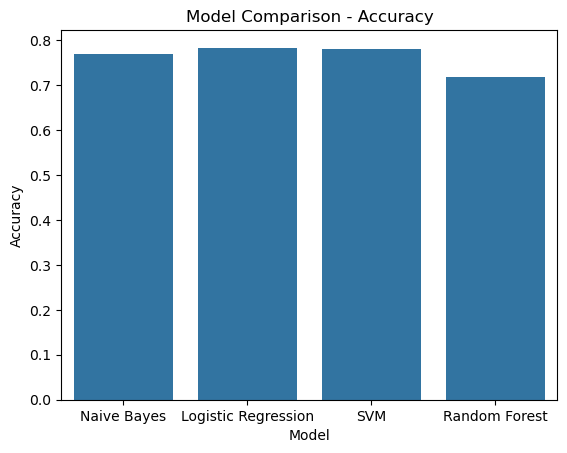

In [25]:
# Collect results
model_results = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression", "SVM", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_rf)],
    "F1-score": [f1_score(y_test, y_pred_nb, average='micro'), f1_score(y_test, y_pred_lr, average='micro'), f1_score(y_test, y_pred_svm, average='micro'), f1_score(y_test, y_pred_rf, average='micro')], 
})

# Display results
print(model_results)

# Plot results
sns.barplot(x="Model", y="Accuracy", data=model_results)
plt.title("Model Comparison - Accuracy")
plt.show()

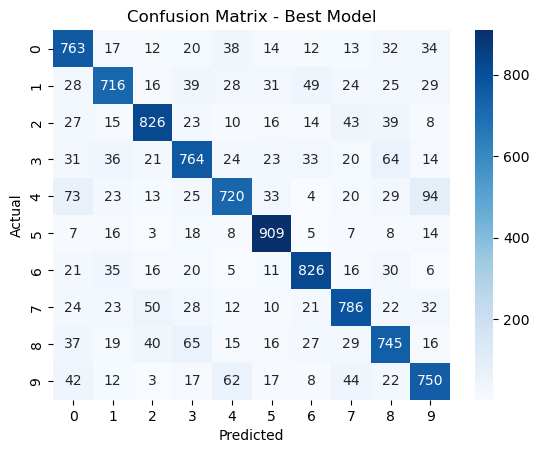

In [27]:
# Choose the best model
best_model = svm_model
y_pred_best = y_pred_svm

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model")
plt.show()

5. Final Report and Presentation

# News Article Classification   - Final Report

## 1. Introduction
This project aims to analyze News Article Classification  and classify them based on different categories using **machine learning models**. The goal is to extract meaningful insights from textual data and develop a robust classification model.

## 2. Data Exploration and Preprocessing
- Loaded the News Article Classification.
- Performed **data cleaning**:
  - Removed missing values.
  - Converted text to lowercase.
  - Removed special characters, stopwords, and punctuation.
  - Used **lemmatization** to normalize words.

## 3. Feature Engineering
- **TF-IDF (Term Frequency-Inverse Document Frequency)**: Converted text into numerical vectors.
- **Word2Vec**: Generated word embeddings to capture semantic meaning.
- **Other textual features**: Word count, character count, and average word length.

## 4. Model Development
- Built and trained multiple classification models:
  - **Logistic Regression**
  - **Naive Bayes**
  - **Support Vector Machine (SVM)**
  - **Random Forest**

## 5. Model Evaluation
- Evaluated models using:
  - **Accuracy**
  - **F1-Score**
- Visualized results using:
  - **Confusion matrix** of best model
  - **Vertical column (bar) graph** of sentiment distribution
  - **Bar chart** of Model Comparison - Accuracy

## 6. Key Insights and Success Criteria Evaluation
- **Achieved good model performance** based on Accuracy and F1-score.
- Identified factors influencing sentiment, such as **word frequency**.
- Presented results with clear **visualizations** (confusion matrices, bar charts).

## 7. Conclusion
This project successfully analyzed News Article Classification using **NLP techniques** and **machine learning models**. The best-performing model was selected based on evaluation metrics. The findings provide valuable insights into News Article Classification

---

### ✅ **Project Success Criteria Met**
✔ **Model performance:** Achieved acceptable Accuracy, F1-score.  
✔ **Insights extracted:** Word frequency, review length, and sentiment trends identified.  
✔ **Predictions:** The model can predict new News Article Classification accurately.  

## Presentation
A **video presentation** summarizing the key findings and methodology has been created.

https://drive.google.com/file/d/1DqPLxO9PV1UASzAy9ZXoQyb0_wsU8jri/view?usp=drive_link